In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import textwrap
import os

In [2]:
import glob
all_f= glob.glob('*/*Test_Pred_Copy*')
all_f

['BeijingPM2.5_data\\BeijingPM2.5_data_Test_Pred_Copy.csv',
 'Daily_Sunspot_data\\Daily_Sunspot_data_Test_Pred_Copy.csv',
 'Healthy_control_heart_data\\Healthy_control_heart_data_Test_Pred_Copy.csv',
 'Myocardial_infarction_heart_data\\Myocardial_infarction_heart_data_Test_Pred_Copy.csv',
 'PM2.5_p09_data\\PM2.5_p09_data_Test_Pred_Copy.csv',
 'POWER_Point_Daily_Presure_data\\POWER_Point_Daily_Presure_data_Test_Pred_Copy.csv',
 'POWER_Point_Daily_Temperature\\POWER_Point_Daily_Temperature_data_Test_Pred_Copy.csv',
 'POWER_Point_Daily_WindSpeed_data\\POWER_Point_Daily_WindSpeed_data_Test_Pred_Copy.csv',
 'PRSA_data_2010_12_data\\PRSA_data_2010_12_data_Test_Pred_Copy.csv',
 'SunSpotMonthly_data\\SunSpotMonthly_data_Test_Pred_Copy.csv']

In [3]:
li=[]
for file_name in all_f:
    df=pd.read_csv(file_name)
    li.append(df)

In [4]:
li[1]

,Unnamed: 0,BiLSTM,LSTM,GRU,CNN,RNN,Test_Data,BiLSTM_Final_Pred,LSTM_Final_Pred,GRU_Final_Pred,CNN_Final_Pred,RNN_Final_Pred
0,0,234.562870,239.12451,237.730220,235.113080,238.455250,291,284.141284,263.528922,235.676001,302.527092,233.915995
1,1,296.823820,319.27527,308.281830,307.618350,311.950780,284,256.755916,288.134594,306.039919,302.646470,294.669146
2,2,301.977000,288.02880,309.241330,307.346680,302.918880,319,294.987211,312.433219,323.392022,321.161276,293.160910
3,3,331.313540,341.13710,331.048030,333.993320,329.195650,364,324.323759,365.541495,328.993811,364.119410,324.656398
4,4,363.297580,390.70328,375.825200,378.053300,371.092070,340,322.360601,333.846515,335.268161,356.691006,328.138006
...,...,...,...,...,...,...,...,...,...,...,...,...
14973,14973,115.847946,105.84993,109.141630,114.550674,114.903210,84,74.910971,77.332900,83.025237,89.761424,71.949148
14974,14974,92.435180,87.01090,85.133224,89.481110,91.126114,84,52.367275,78.433504,82.891313,83.888888,81.368139
14975,14975,91.456570,83.24122,89.207130,87.664530,87.747430,77,51.388668,74.663820,82.970770,82.072306,70.465800
14976,14976,86.603290,80.15794,83.383880,83.703380,82.589700,75,46.535381,71.580545,81.141969,78.111155,72.831724


C:\Users\vp123\AppData\Local\Temp\ipykernel_8880\854688675.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.8) # Add space for legend


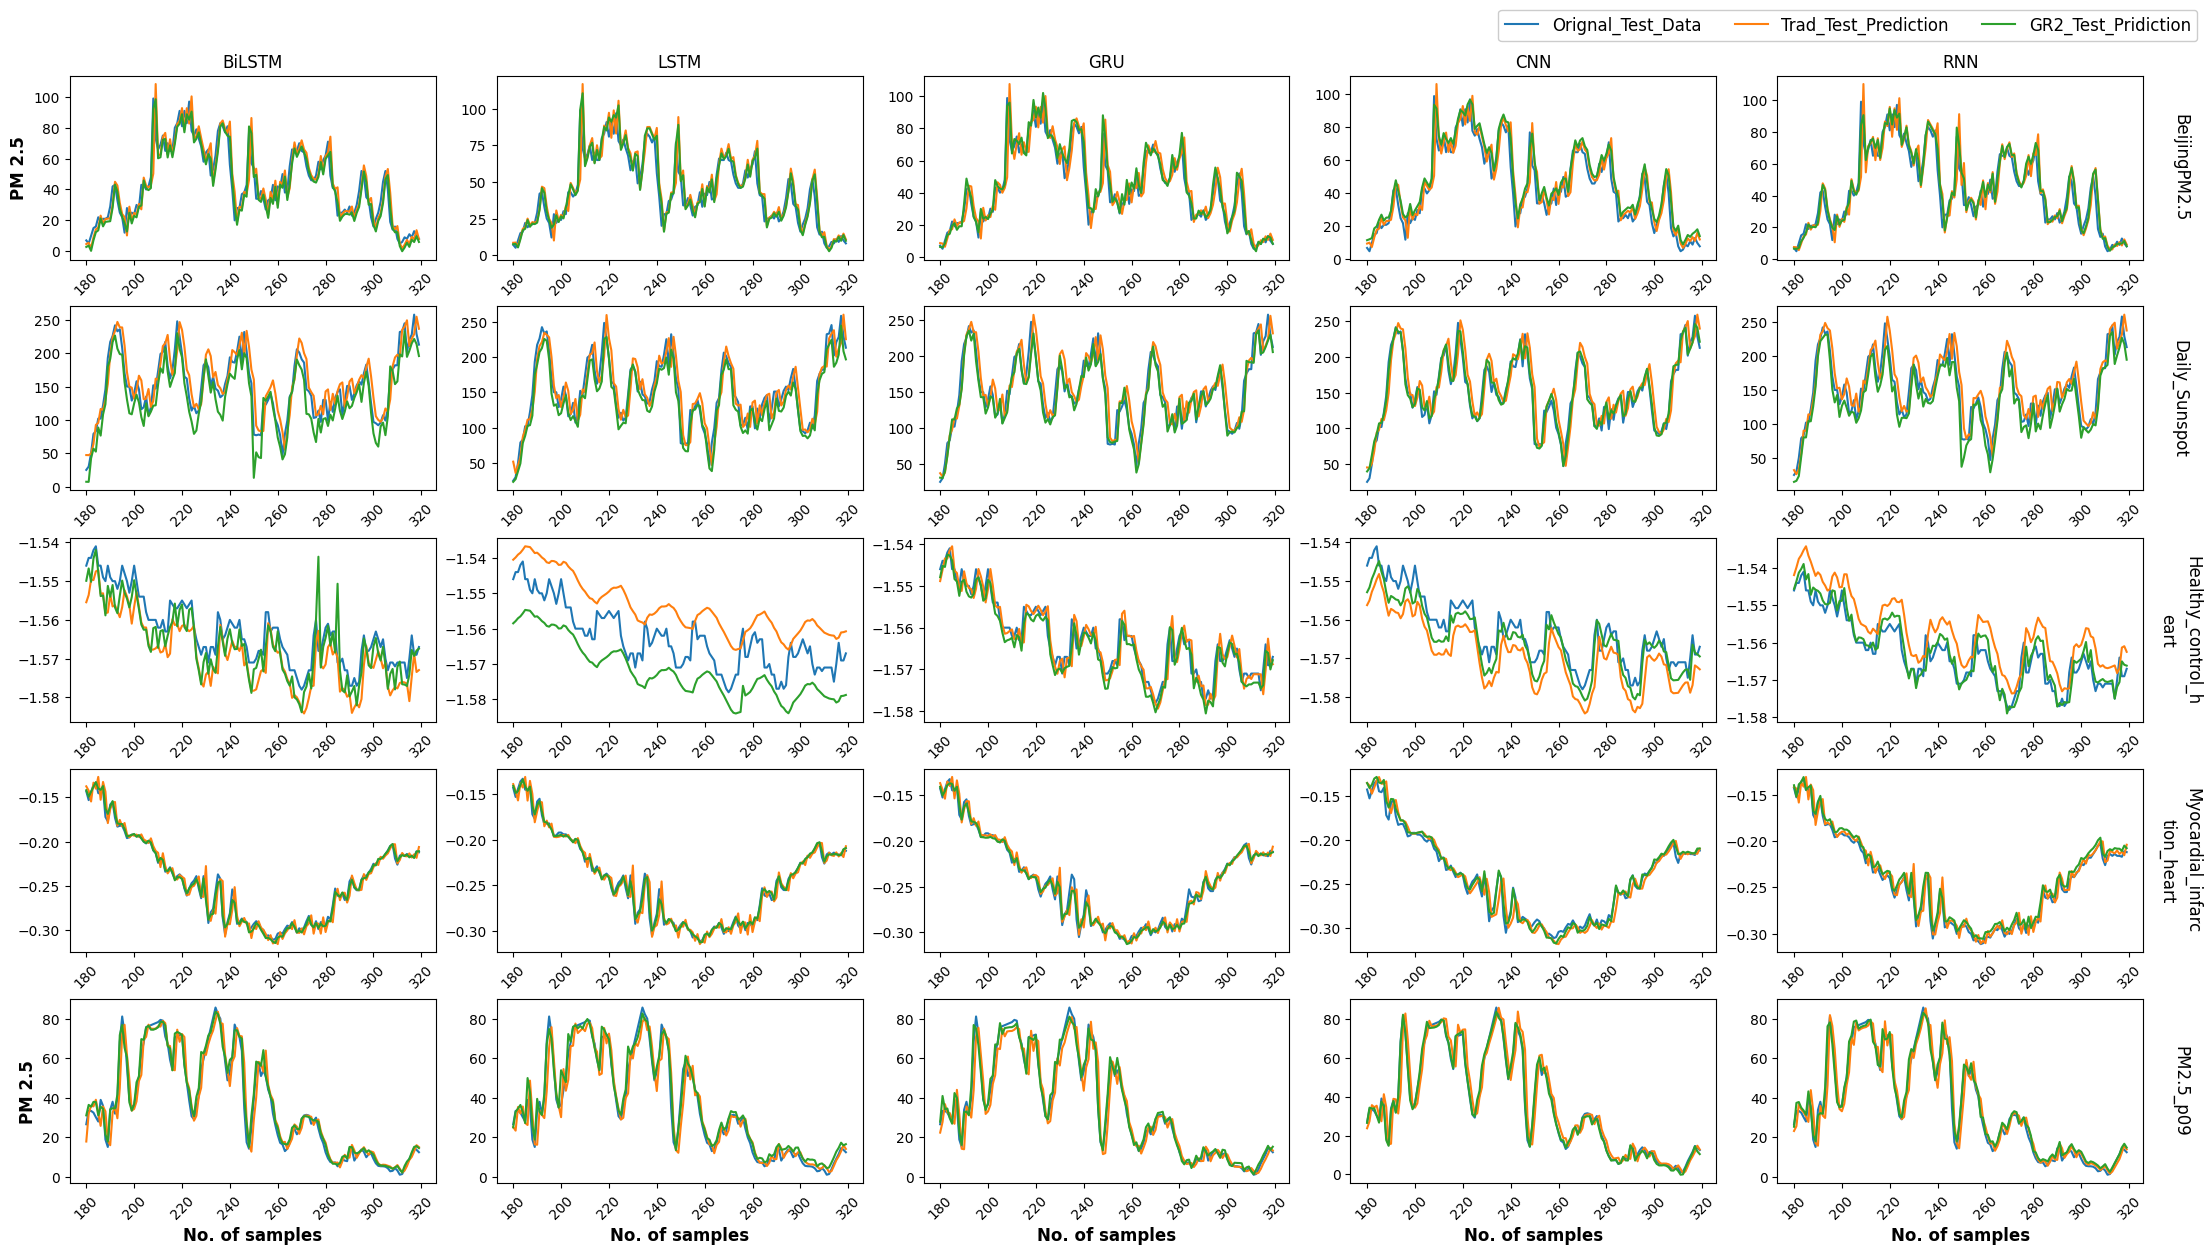

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(22, 12), layout='constrained')
fig.subplots_adjust(right=0.8) # Add space for legend
# Full img titel
# plt.suptitle('All DataSets Orignal (20 Days)',fontsize = 16,weight='bold')
handles, labels = None, None # Initialize handles and labels

for row in range(5):
    vv=[0,1,2,3,4]
    dataset = li[vv[row]]
    for col, k in enumerate([2, 3, 4, 5, 6]):
        j = 7
        p_val = k + j - 1
        
        ax = axs[row, col]
        ax.plot(dataset.iloc[180:320, j-1:j], label='Orignal_Test_Data')
        ax.plot(dataset.iloc[180:320, k-1:k], label='Trad_Test_Prediction')
        ax.plot(dataset.iloc[180:320, p_val-1:p_val], label='GR2_Test_Pridiction')
        ax.legend(fancybox=True, framealpha=1)

        if row == 4:
            ax.set_xlabel('No. of samples', fontsize=12, weight='bold')
        
        if col == 0:
            if row == 0:
                ax.set_ylabel('PM 2.5', fontsize=12, weight='bold')
            elif row == 1:
                ax.set_ylabel('', fontsize=12, weight='bold')
            elif row == 2:
                ax.set_ylabel('', fontsize=12, weight='bold')
            elif row == 3 :
                ax.set_ylabel('', fontsize=12, weight='bold')
            elif row == 4:
                ax.set_ylabel('PM 2.5', fontsize=12, weight='bold')

        if col == 4:
            ylabel_text = '\n'.join(textwrap.wrap(all_f[vv[row]].split("\\")[0].split('_data')[0], width=17))
            ax.set_ylabel(ylabel_text, rotation=270, fontsize=12, va='center', linespacing=1.5)
            ax.yaxis.set_label_coords(1.1, .5)

        if row == 0:
            ax.set_title(dataset.iloc[:, k-1:k].columns[0], fontsize=12)
        # Rotating X-axis labels
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.legend().set_visible(False)
# Add a common legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=5, bbox_to_anchor=(1, 1.04), fontsize=12, fancybox=True, framealpha=1)



# Save png
#os.mkdir('act vs pri')
plt.savefig('act vs pri/a_p_Gab_0 to 4.jpeg',dpi=600,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')


C:\Users\vp123\AppData\Local\Temp\ipykernel_8880\2431759643.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.8) # Add space for legend


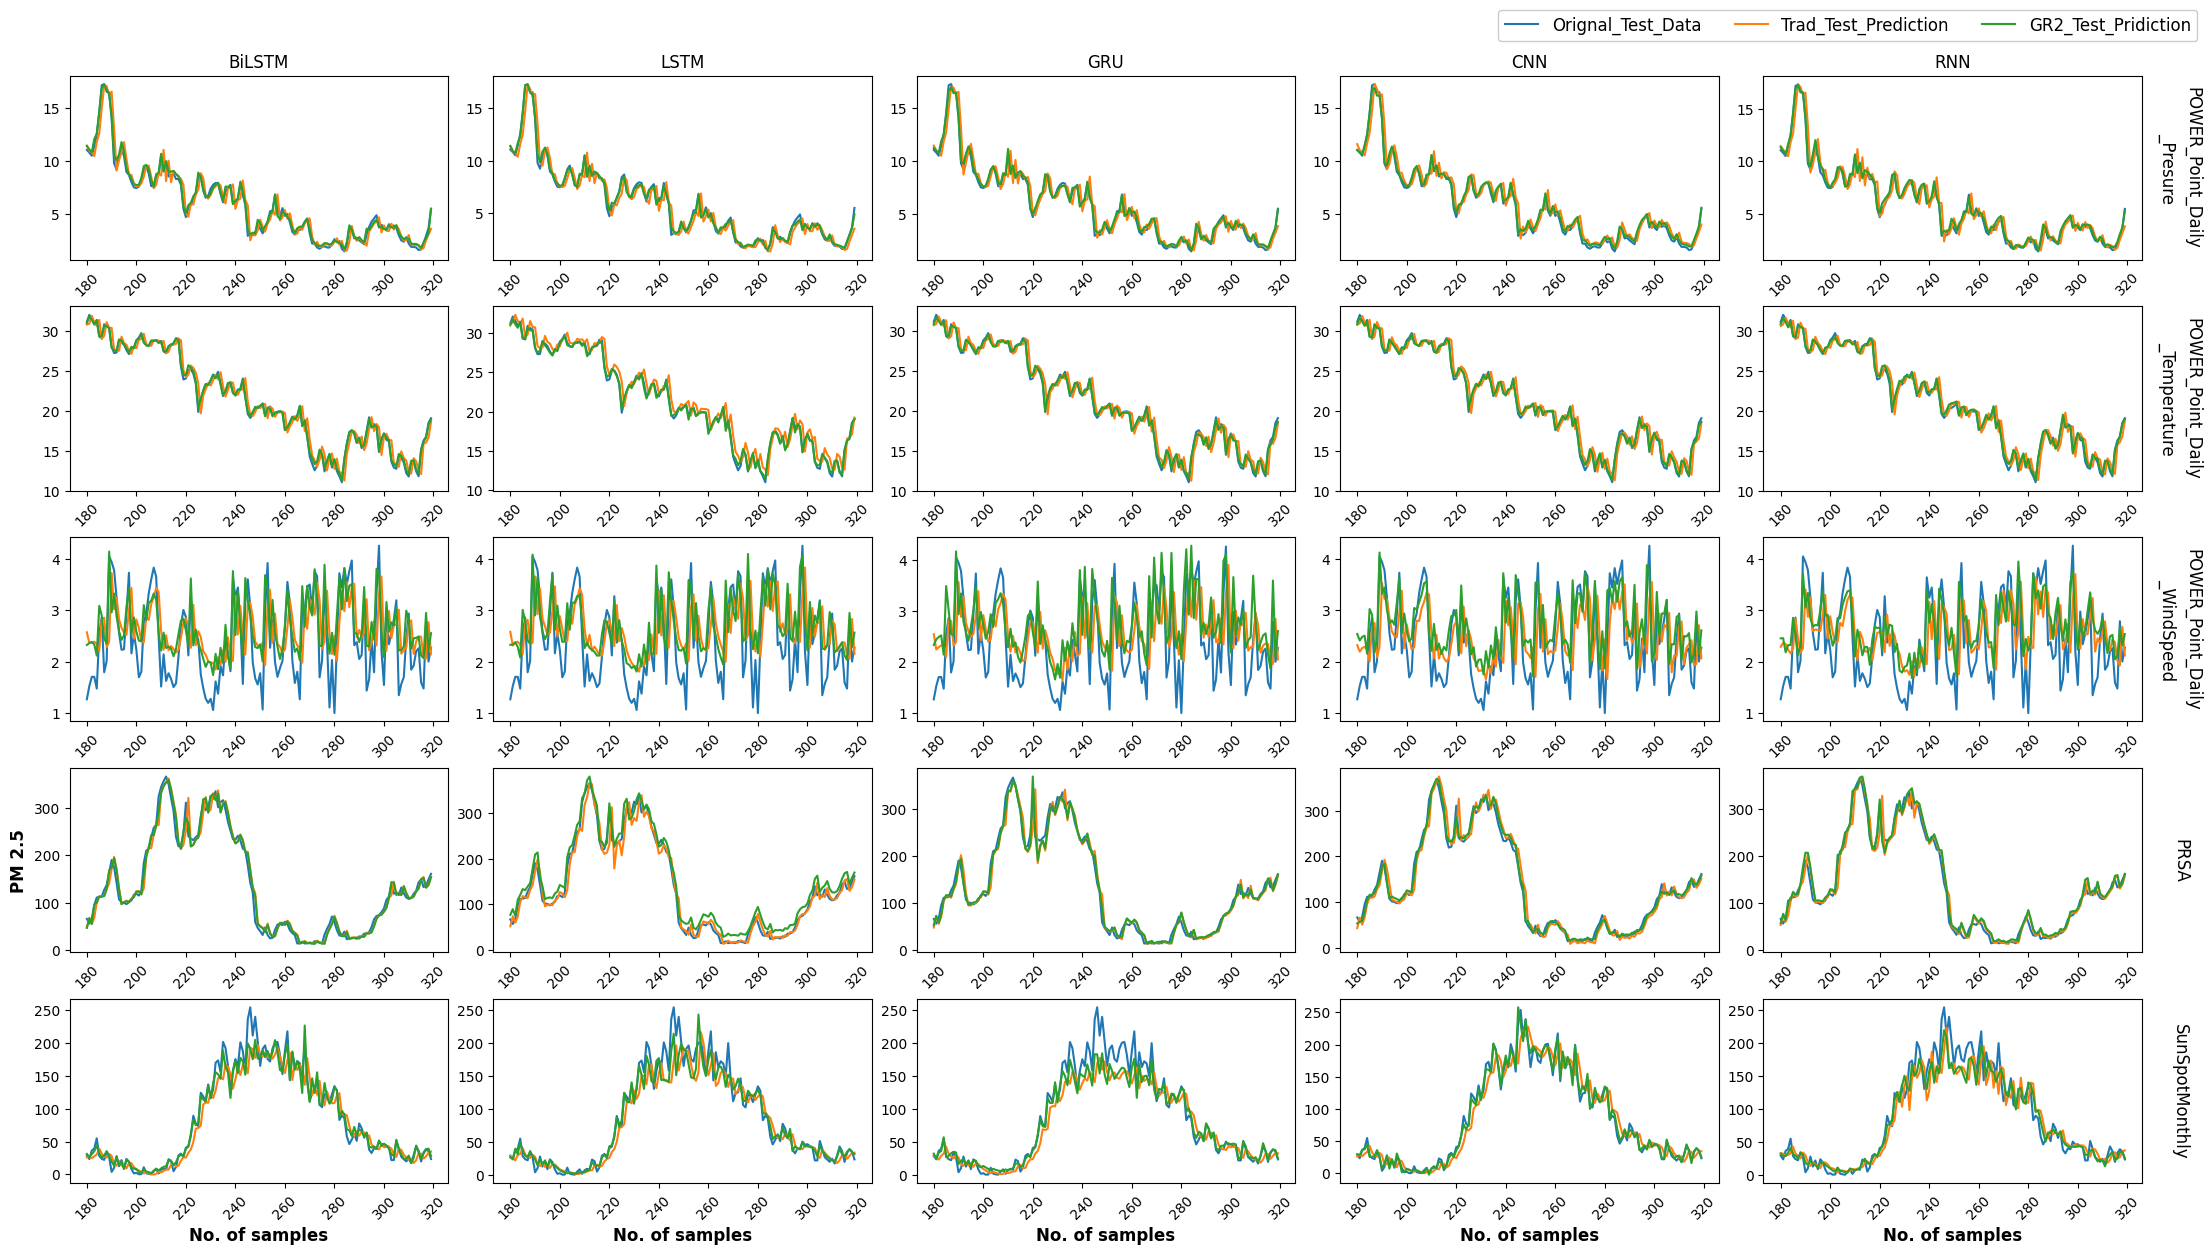

In [9]:
fig, axs = plt.subplots(5, 5, figsize=(22, 12), layout='constrained')
fig.subplots_adjust(right=0.8) # Add space for legend
# Full img titel
# plt.suptitle('All DataSets Orignal (20 Days)',fontsize = 16,weight='bold')
handles, labels = None, None # Initialize handles and labels

for row in range(5):
    vv=[5,6,7,8,9]
    dataset = li[vv[row]]
    for col, k in enumerate([2, 3, 4, 5, 6]):
        j = 7
        p_val = k + j - 1
        
        ax = axs[row, col]
        ax.plot(dataset.iloc[180:320, j-1:j], label='Orignal_Test_Data')
        ax.plot(dataset.iloc[180:320, k-1:k], label='Trad_Test_Prediction')
        ax.plot(dataset.iloc[180:320, p_val-1:p_val], label='GR2_Test_Pridiction')
        ax.legend(fancybox=True, framealpha=1)

        if row == 4:
            ax.set_xlabel('No. of samples', fontsize=12, weight='bold')
        
        if col == 0:
            if row == 0:
                ax.set_ylabel('', fontsize=12, weight='bold')
            elif row == 1:
                ax.set_ylabel('', fontsize=12, weight='bold')
            elif row == 2:
                ax.set_ylabel('', fontsize=12, weight='bold')
            elif row == 3 :
                ax.set_ylabel('PM 2.5', fontsize=12, weight='bold')
            elif row == 4:
                ax.set_ylabel('', fontsize=12, weight='bold')

        if col == 4:
            ylabel_text = '\n'.join(textwrap.wrap(all_f[vv[row]].split("\\")[0].split('_data')[0], width=17))
            ax.set_ylabel(ylabel_text, rotation=270, fontsize=12, va='center', linespacing=1.5)
            ax.yaxis.set_label_coords(1.1, .5)


        if row == 0:
            ax.set_title(dataset.iloc[:, k-1:k].columns[0], fontsize=12)
        # Rotating X-axis labels
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.legend().set_visible(False)
# Add a common legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=5, bbox_to_anchor=(1, 1.04), fontsize=12, fancybox=True, framealpha=1)



# Save png
#os.mkdir('act vs pri')
plt.savefig('act vs pri/a_p_Gab_5 to 9.jpeg',dpi=600,bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')


C:\Users\vp123\AppData\Local\Temp\ipykernel_24956\93707521.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(right=0.8) # Add space for legend


IndexError: list index out of range

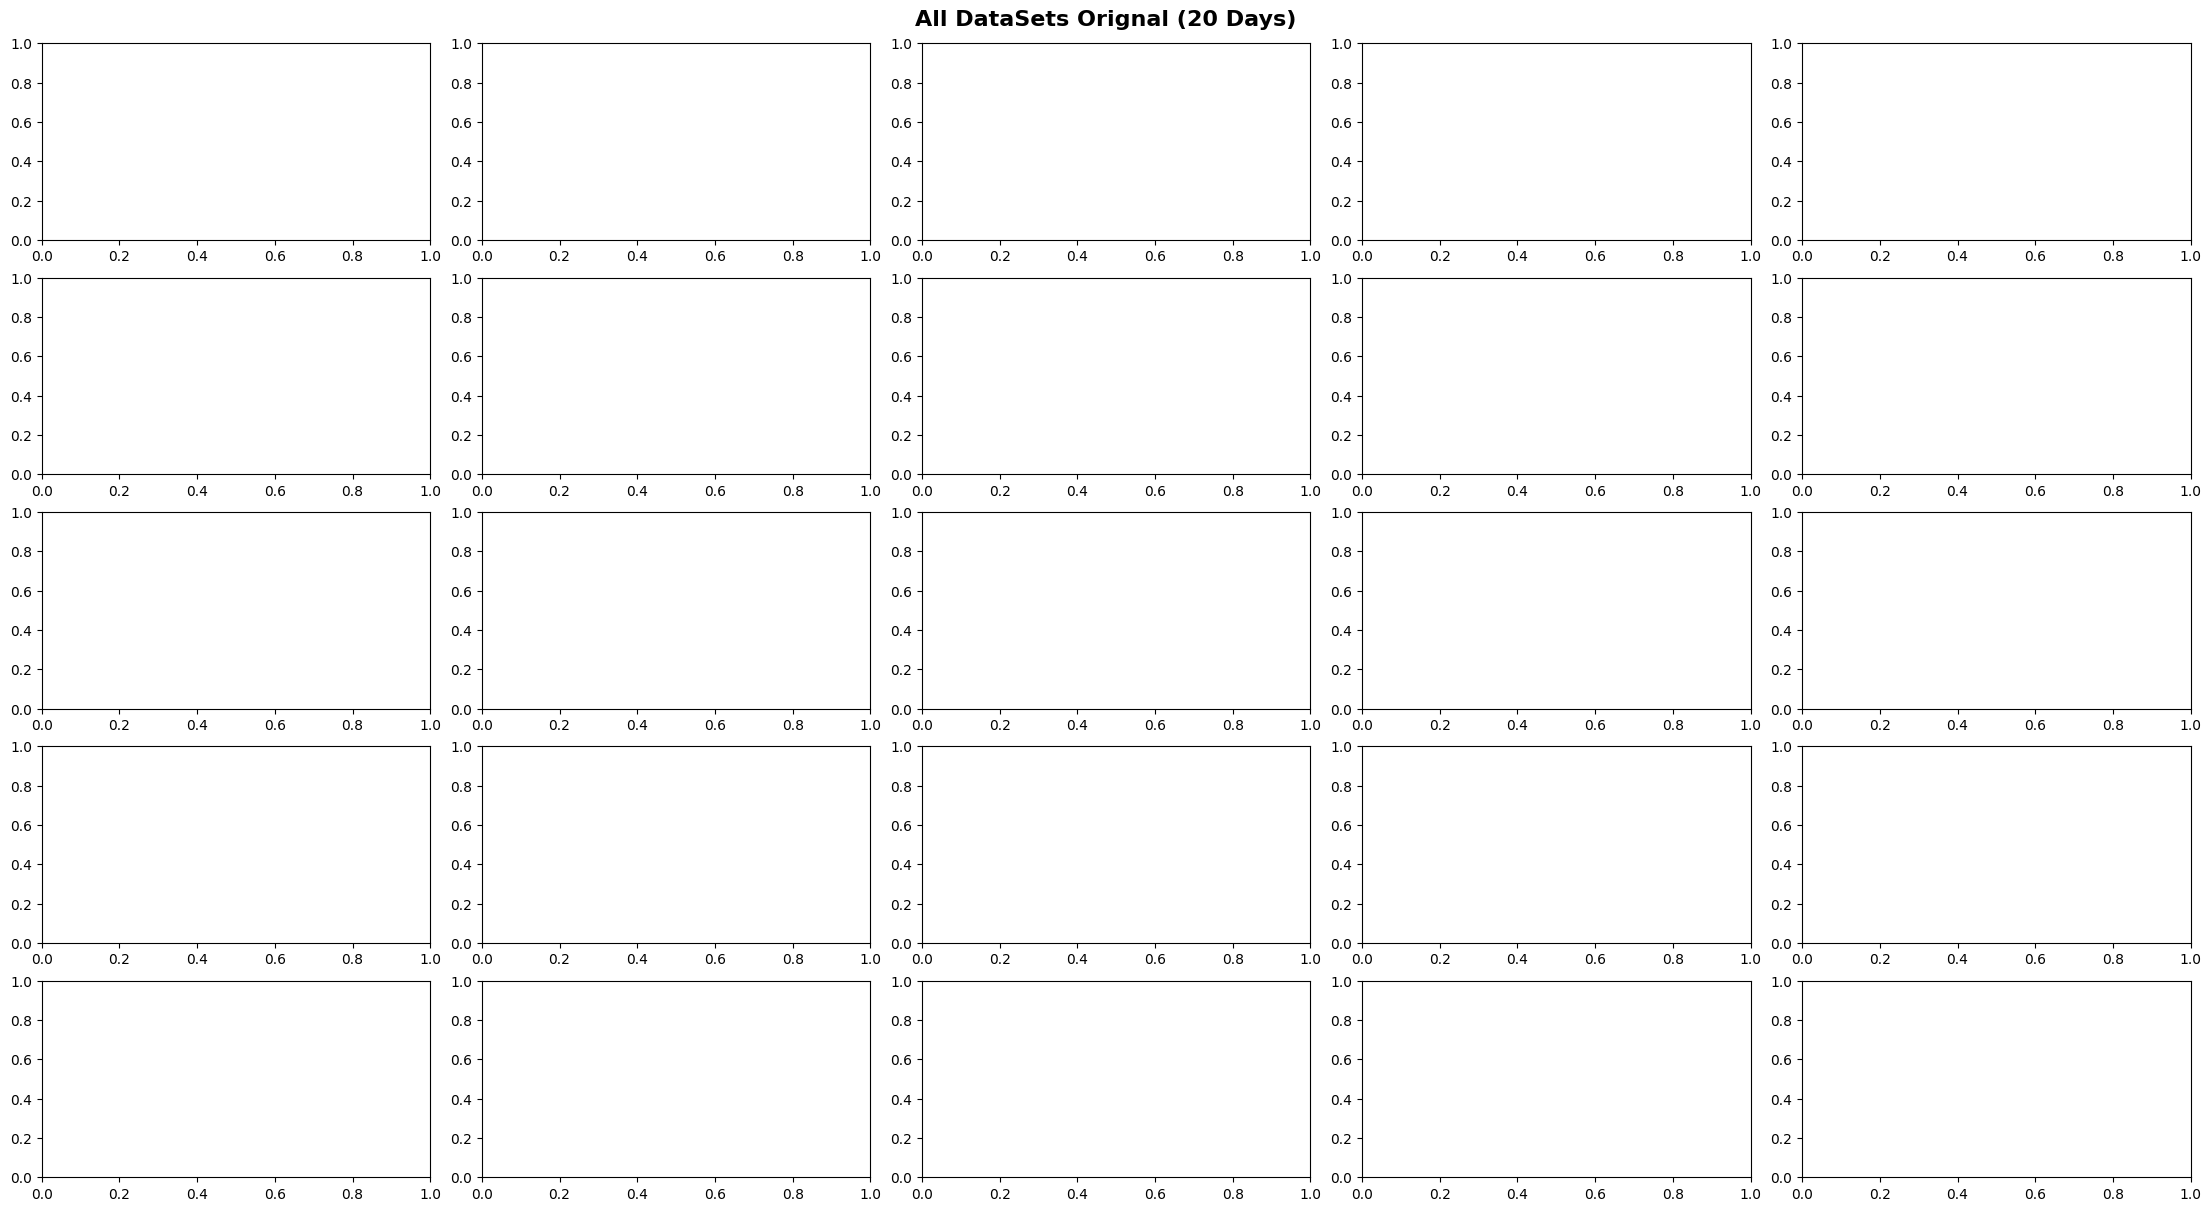

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(22, 12), layout='constrained')
fig.subplots_adjust(right=0.8) # Add space for legend
# Full img titel
plt.suptitle('All DataSets Orignal (20 Days)',fontsize = 16,weight='bold')
handles, labels = None, None # Initialize handles and labels

for row in range(5):
    vv=[10,11,12,13,14]
    dataset = li[vv[row]]
    for col, k in enumerate([2, 3, 4, 5, 6]):
        j = 7
        p_val = k + j - 1
        
        ax = axs[row, col]
        ax.plot(dataset.iloc[:, j-1:j], label='Actual')
        ax.plot(dataset.iloc[:, k-1:k], label='Pre_normal')
        ax.plot(dataset.iloc[:, p_val-1:p_val], label='Pre_w_GAB')
        ax.legend(fancybox=True, framealpha=1)

        if row == 4:
            ax.set_xlabel('No. of samples', fontsize=12, weight='bold')
        
        if col == 0:
            if row == 0:
                ax.set_ylabel('BTC(USD)', fontsize=12, weight='bold')
            elif row == 1:
                ax.set_ylabel('USD', fontsize=12, weight='bold')
            elif row == 2:
                ax.set_ylabel('pascal', fontsize=12, weight='bold')
            elif row == 3 or row == 4:
                ax.set_ylabel('PM 2.5', fontsize=12, weight='bold')

        if col == 4:
            ylabel_text = '\n'.join(textwrap.wrap(all_f[vv[row]].split("\\")[0], width=17))
            ax.set_ylabel(ylabel_text, rotation=270, fontsize=12, va='center', linespacing=1.5)
            ax.yaxis.set_label_coords(1.1, .5)

        if row == 0:
            ax.set_title(dataset.iloc[:, k-1:k].columns[0], fontsize=12)
        # Rotating X-axis labels
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        ax.legend().set_visible(False)
# Add a common legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=5, bbox_to_anchor=(1, 1.01), fontsize=12, fancybox=True, framealpha=1)



# Save png
#os.mkdir('act vs pri')
plt.savefig('act vs pri/a_p_Gab_10 to 14',bbox_inches ="tight",pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape')
